In [1]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
import neuralNet as nn
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
all_data = loadmat("../ex3data1.mat")
X_all = all_data['X']
y_all = all_data['y']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = .9)
y_classes = np.unique(y_train)
classDict = dict(zip(range(len(y_classes)),y_classes))

/Users/johnsnyder/.virtualenvs/neuralNetTut/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
print(X_train.shape,X_test.shape)
print(classDict)
print(y_classes)

(4500, 400) (500, 400)
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}
[ 1  2  3  4  5  6  7  8  9 10]


'10' indicates a zero digit in this particular data set.

A randomly selected training label and input are displayed below

label:  [1]


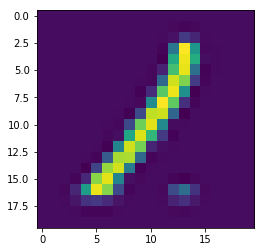

X:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.91855125e-18  4.30623638e-04
  -5.11257864e-03 -2.17815564e-02 -1.12789352e-02  1.64079521e-04
   5.00408497e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.18881073e-18 -2.96920223e-03
   1.79197419e-02  1.50273379e-01  7.79155966e-02 -1.12938731e-03
  -3.45786963e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 

In [5]:
rand_obs = np.random.randint(X_train.shape[0])
rand_img = X_train[rand_obs].reshape((20,20)).transpose()
plt.imshow(rand_img)
print("label: ",y_train[rand_obs])
plt.show()
print("X:\n",rand_img)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train).transpose()
y_train_onehot = label_binarize(y_train,y_classes).transpose()

X_test_scaled = scaler.transform(X_test).transpose()
y_test_onehot = label_binarize(y_test,y_classes).transpose()

In [7]:
neuralNetMutExc = nn.fullyConnectClassHyper(X_train_scaled,y_train_onehot,classDict,[30,30,30], alpha =.05, p_keep = 1.0, regular = {"lambd":0.0, "N":2})

In [8]:
neuralNetMutExc.fit(100,X_test_scaled,y_test_onehot)

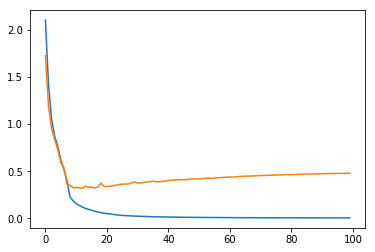

In [9]:
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

#### Updating hyperparameters

Graph above indicates overfit. 
Implement regularization and decrease learning rate.

In [10]:
#update hyperparameters
hyperDict = {"alpha":.01,"regular":{"lambd":0.03, "N":2}}
neuralNetMutExc.updateHyperparam(**hyperDict)

Attempt adding non-existent hyperparameters and train further

In [11]:
neuralNetMutExc.updateHyperparam(fakeParam = 2,fakeParam2 = 5)

The following are not valid hyperparameter names
 ['fakeParam2', 'fakeParam']
These are the hyperparameters and their values:
gradNorm :  inf
regular :  {'lambd': 0.03, 'N': 2}
gradClip :  inf
p_keep :  1.0
alpha :  0.01


In [12]:
neuralNetMutExc.fit(100,X_test_scaled,y_test_onehot)

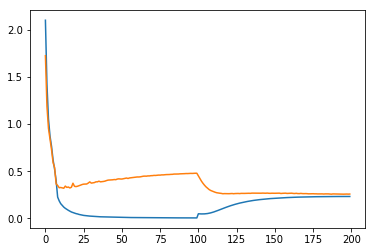

In [13]:
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

#### Evaluate model fit

In [14]:
YHat, loss = neuralNetMutExc.predict(X_test_scaled,y_test_onehot)
print(YHat.shape)
max_ind = np.argmax(YHat,axis = 0)
max_prob = np.amax(YHat,axis = 0)
max_prob_class = [neuralNetMutExc.outputL.classVec[x] for x in max_ind]

print(len(max_prob_class))
print(len(y_test))

(10, 500)
500
500


In [15]:
print("first 10 predicted probability vectors:\n",YHat[:,:10])
print("predicted labels:\n",max_prob_class)
print("actual labels:\n",y_test.transpose())
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique,counts))

first 10 predicted probability vectors:
 [[6.59972050e-04 5.13404455e-04 2.88020443e-04 5.65709314e-03
  5.31025180e-03 6.16901206e-03 1.02060304e-02 2.83580084e-03
  9.16921728e-01 2.83073339e-03]
 [9.91327348e-01 2.84100534e-03 2.88020443e-04 5.91037989e-03
  4.38710958e-03 6.16901206e-03 1.02060304e-02 9.74241096e-03
  2.17636425e-02 4.37596563e-03]
 [3.01979576e-03 2.60029046e-03 2.88020443e-04 6.82566183e-01
  6.57148928e-03 6.64601694e-03 5.36985653e-02 2.83580084e-03
  7.58215126e-03 2.59197157e-03]
 [1.29276644e-04 5.13404455e-04 9.43006958e-01 5.65709314e-03
  1.73538034e-01 2.33959710e-01 6.61848520e-02 8.84630976e-01
  5.36848593e-03 2.18237125e-02]
 [1.29276644e-04 1.39429728e-02 3.46475985e-03 2.34666390e-01
  2.48184637e-02 3.28314255e-01 3.83281537e-02 4.26036207e-03
  2.50877754e-03 3.44981337e-02]
 [2.54023078e-04 5.99102924e-03 2.03525650e-03 1.24729615e-02
  4.38710958e-03 5.78481138e-02 1.02060304e-02 6.07009160e-02
  6.90242755e-03 9.00191481e-01]
 [2.12319231e-03 

{1: 48, 2: 42, 3: 52, 4: 42, 5: 56, 6: 66, 7: 58, 8: 46, 9: 51, 10: 39}

In [16]:
print("accuracy:",np.mean(max_prob_class==y_test.transpose()))

accuracy: 0.946
